In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import imageio
from scipy.signal import convolve2d

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


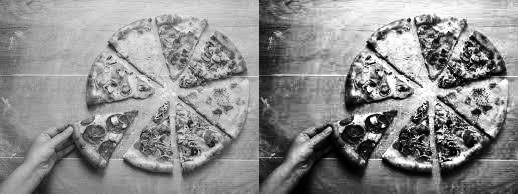

In [ ]:

img = cv.imread('/content/drive/MyDrive/Maestría en Ciencias de la Computación/Visión Computacional/food.jpeg', 0)

def equalize_histogram(image):
  result = np.copy(image);
  a = np.zeros((256,),dtype=np.float16)
  b = np.zeros((256,),dtype=np.float16)

  height,width=result.shape

  #finding histogram
  for i in range(width):
      for j in range(height):
          g = result[j,i]
          a[g] = a[g]+1

  #performing histogram equalization
  tmp = 1.0/(height*width)
  b = np.zeros((256,),dtype=np.float16)

  for i in range(256):
      for j in range(i+1):
          b[i] += a[j] * tmp;
      b[i] = round(b[i] * 255);

  # b now contains the equalized histogram
  b=b.astype(np.uint8)

  #Re-map values from equalized histogram into the image
  for i in range(width):
      for j in range(height):
          g = result[j,i]
          result[j,i]= b[g]
  return result;

img_eq = equalize_histogram(img)
final_frame = cv.hconcat((img, img_eq))
cv2_imshow(final_frame)